<a href="https://colab.research.google.com/github/IshitaSinghFaujdar/gene-disease-association/blob/main/BDACIA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gzip

with gzip.open("CTD_curated_genes_diseases.tsv.gz", "rt", encoding="utf-8") as f:
    for _ in range(10):  # Print first 10 lines
        print(f.readline())



# The Comparative Toxicogenomics Database (CTD) - http://ctdbase.org/

#   Copyright 2002-2012 MDI Biological Laboratory. All rights reserved.

#   Copyright 2012-2025 NC State University. All rights reserved.

#  

# 

# Use is subject to the terms set forth at http://ctdbase.org/about/legal.jsp

# These terms include:

# 

#   1. All forms of publication (e.g., web sites, research papers, databases,

#      software applications, etc.) that use or rely on CTD data must cite CTD.



In [ ]:
df = pd.read_csv(
    "CTD_curated_genes_diseases.tsv.gz",
    sep="\t",
    compression="gzip",
    skiprows=27  # Skips lines that start with #

)

print(df.head())


  # GeneSymbol   GeneID                DiseaseName     DiseaseID  \
0            #      NaN                        NaN           NaN   
1            A  50518.0                 Dermatitis  MESH:D003872   
2            A  50518.0          Diabetes Mellitus  MESH:D003920   
3            A  50518.0  Diabetes Mellitus, Type 2  MESH:D003924   
4            A  50518.0     Diabetic Nephropathies  MESH:D003928   

     DirectEvidence OmimIDs PubMedIDs  
0               NaN     NaN       NaN  
1  marker/mechanism     NaN  32937126  
2  marker/mechanism     NaN   1473152  
3  marker/mechanism     NaN   8146154  
4  marker/mechanism     NaN  37769864  


In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34129 entries, 0 to 34128
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   # GeneSymbol    34129 non-null  object 
 1   GeneID          34128 non-null  float64
 2   DiseaseName     34128 non-null  object 
 3   DiseaseID       34128 non-null  object 
 4   DirectEvidence  34128 non-null  object 
 5   OmimIDs         5283 non-null   object 
 6   PubMedIDs       29748 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.8+ MB


,# GeneSymbol,GeneID,DiseaseName,DiseaseID,DirectEvidence,OmimIDs,PubMedIDs
0,#,NaN,NaN,NaN,NaN,NaN,NaN
1,A,50518.0,Dermatitis,MESH:D003872,marker/mechanism,NaN,32937126
2,A,50518.0,Diabetes Mellitus,MESH:D003920,marker/mechanism,NaN,1473152
3,A,50518.0,"Diabetes Mellitus, Type 2",MESH:D003924,marker/mechanism,NaN,8146154
4,A,50518.0,Diabetic Nephropathies,MESH:D003928,marker/mechanism,NaN,37769864


In [ ]:
df.columns


Index(['# GeneSymbol', 'GeneID', 'DiseaseName', 'DiseaseID', 'DirectEvidence',
       'OmimIDs', 'PubMedIDs'],
      dtype='object')

In [ ]:
df.rename(columns={"# GeneSymbol": "GeneSymbol"}, inplace=True)


In [ ]:
df.isnull().sum()


,0
GeneSymbol,0
GeneID,1
DiseaseName,1
DiseaseID,1
DirectEvidence,1
OmimIDs,28846
PubMedIDs,4381


Plan:

✅ Step 1: Convert data into a binary matrix (Disease × Genes)

✅ Step 2: Apply Hierarchical Clustering

✅ Step 3: Visualize with a Heatmap/Dendrogram



Step 1: Create the Disease-Gene Binary Matrix
📌 This matrix will have:

Rows = Diseases

Columns = Genes

Cells = 1 if a gene is linked to a disease, 0 otherwise

In [ ]:
import pandas as pd
# Create the binary matrix (pivot table)
binary_matrix = df.pivot_table(index="DiseaseName", columns="GeneSymbol", aggfunc=lambda x: 1, fill_value=0)

# Show the first few rows
binary_matrix.head()


DirectEvidence                 \
GeneSymbol                                                A A1BG A2M A2ML1   
DiseaseName                                                                  
17-Hydroxysteroid Dehydrogenase Deficiency                0    0   0     0   
18-Hydroxylase deficiency                                 0    0   0     0   
2,4-Dienoyl-CoA Reductase Deficiency                      0    0   0     0   
2-Hydroxyglutaricaciduria                                 0    0   0     0   
2-Methylbutyryl-CoA Dehydrogenase Deficiency              0    0   0     0   

                                                                            \
GeneSymbol                                   A4GALT AAAS AADAC AADAT AAGAB   
DiseaseName                                                                  
17-Hydroxysteroid Dehydrogenase Deficiency        0    0     0     0     0   
18-Hydroxylase deficiency                         0    0     0     0     0   
2,4-Dienoyl-CoA Reductase Deficiency              0    0     0     0     0   
2-Hydroxyglutaricaciduria                         0    0     0     0     0   
2-Methylbutyryl-CoA Dehydrogenase Deficiency      0    0     0     0     0   

                                                    ... PubMedIDs          \
GeneSymbol                                   AANAT  ...   ZSCAN22 ZSCAN31   
DiseaseName                                         ...                     
17-Hydroxysteroid Dehydrogenase Deficiency       0  ...         0       0   
18-Hydroxylase deficiency                        0  ...         0       0   
2,4-Dienoyl-CoA Reductase Deficiency             0  ...         0       0   
2-Hydroxyglutaricaciduria                        0  ...         0       0   
2-Methylbutyryl-CoA Dehydrogenase Deficiency     0  ...         0       0   

                                                                               \
GeneSymbol                                   ZSWIM5 ZSWIM6 ZSWIM9 ZW10 ZWILCH   
DiseaseName                                                                     
17-Hydroxysteroid Dehydrogenase Deficiency        0      0      0    0      0   
18-Hydroxylase deficiency                         0      0      0    0      0   
2,4-Dienoyl-CoA Reductase Deficiency              0      0      0    0      0   
2-Hydroxyglutaricaciduria                         0      0      0    0      0   
2-Methylbutyryl-CoA Dehydrogenase Deficiency      0      0      0    0      0   

                                                             
GeneSymbol                                   ZWINT ZYX ZZZ3  
DiseaseName                                                  
17-Hydroxysteroid Dehydrogenase Deficiency       0   0    0  
18-Hydroxylase deficiency                        0   0    0  
2,4-Dienoyl-CoA Reductase Deficiency             0   0    0  
2-Hydroxyglutaricaciduria                        0   0    0  
2-Methylbutyryl-CoA Dehydrogenase Deficiency     0   0    0  

[5 rows x 45530 columns]

In [ ]:
binary_matrix.values.sum()

binary_matrix.sum().sum()  # Total count of 1s

binary_matrix.sum(axis=1).describe()  # Disease-wise count stats
binary_matrix.sum(axis=0).describe()  # Gene-wise count stats


,0
count,45530.000000
mean,3.747859
std,6.915087
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,192.000000


Next Steps for Clustering
Which approach do you prefer?

Hierarchical Clustering (Dendrogram, interpretable but slow for large datasets).
K-Means Clustering (Fast, scalable, needs choosing k).
DBSCAN (Finds dense clusters but depends on tuning parameters).
Possible Insights We Can Extract:

Group diseases with similar gene signatures.
Identify rare vs. common disease clusters.
Check if clusters align with known biological categories (e.g., metabolic diseases, neurological disorders).

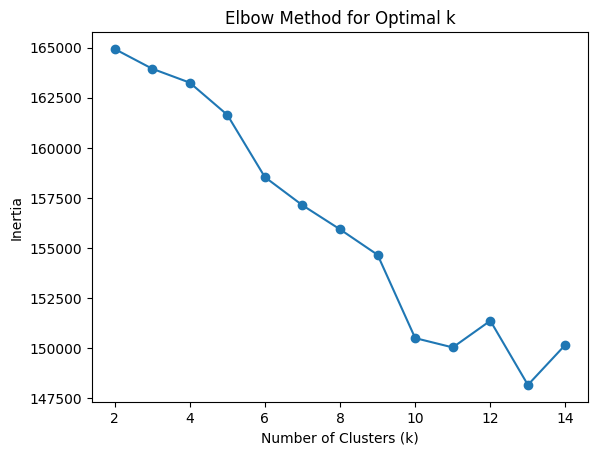

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different cluster numbers
inertia = []
k_values = range(2, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(binary_matrix)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
# Run K-Means
k = 10  # You can adjust this based on the elbow graph
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
binary_matrix['Cluster'] = kmeans.fit_predict(binary_matrix)

# Print cluster distribution
print("\nCluster Distribution:")
print(binary_matrix["Cluster"].value_counts())


Cluster Distribution:
Cluster
1    5714
2     134
0       3
4       1
8       1
7       1
6       1
3       1
5       1
9       1
Name: count, dtype: int64


In [ ]:
print("\nAvailable diseases in dataset:\n")
for i, disease in enumerate(binary_matrix.index, start=1):
    print(f"{i}. {disease}")


Available diseases in dataset:

1. 17-Hydroxysteroid Dehydrogenase Deficiency
2. 18-Hydroxylase deficiency
3. 2,4-Dienoyl-CoA Reductase Deficiency
4. 2-Hydroxyglutaricaciduria
5. 2-Methylbutyryl-CoA Dehydrogenase Deficiency
6. 22q11 Deletion Syndrome
7. 3-Hydroxy-3-Methylglutaryl-CoA Lyase Deficiency
8. 3-Hydroxy-3-Methylglutaryl-CoA Synthase 2 Deficiency
9. 3-Hydroxyacyl-CoA Dehydrogenase Deficiency
10. 3-METHYLGLUTACONIC ACIDURIA WITH DEAFNESS, ENCEPHALOPATHY, AND LEIGH-LIKE SYNDROME
11. 3-METHYLGLUTACONIC ACIDURIA, TYPE VIIB
12. 3-METHYLGLUTACONIC ACIDURIA, TYPE VIII
13. 3-Methylglutaconic Aciduria, Type I
14. 3-Methylglutaconic Aciduria, Type V
15. 3-methylcrotonyl CoA carboxylase 1 deficiency
16. 3-methylcrotonyl CoA carboxylase 2 deficiency
17. 3C syndrome
18. 46, XX Disorders of Sex Development
19. 46, XY Sex Reversal 5
20. 46,XX SEX REVERSAL 1
21. 46,XX SEX REVERSAL 2
22. 46,XX SEX REVERSAL WITH DYSGENESIS OF KIDNEYS, ADRENALS, AND LUNGS
23. 46,XY Gonadal Dysgenesis, Complete 

In [ ]:
def find_disease_cluster(user_input, df):
    closest_match = difflib.get_close_matches(user_input, df.index, n=1)
    if closest_match:
        disease_name = closest_match[0]
        cluster = df.loc[disease_name, "Cluster"]
        print(f"\nDisease: {disease_name} belongs to Cluster {cluster}")
    else:
        print("\nNo close match found in dataset.")

In [ ]:
def get_cluster_diseases(cluster_num, df):
    return df[df["Cluster"] == cluster_num].index.tolist()

cluster_diseases = get_cluster_diseases(1, binary_matrix)  # Get diseases in Cluster 1
print("Other diseases in the same cluster:", cluster_diseases)


In [ ]:
# Filter matrix to include only diseases in the given cluster
cluster_matrix = binary_matrix.loc[cluster_diseases, :-1]  # Exclude "Cluster" column

# Sum gene contributions to find most commonly involved genes
common_genes = cluster_matrix.sum().sort_values(ascending=False).head(10)  # Top 10 genes

print("Top shared genes in this cluster:\n", common_genes)

In [ ]:
from scipy.spatial.distance import cdist
import numpy as np

# Compute distance between cluster centroids
cluster_centers = kmeans.cluster_centers_
distances = cdist(cluster_centers, cluster_centers, metric="euclidean")

# Find closest cluster
closest_cluster = np.argsort(distances[1])[1]  # 1 is Cluster 1

print(f"Cluster {closest_cluster} is most similar to Cluster 1.")


In [ ]:
# User input for disease
disease_input = input("\nEnter the name of a disease from the list above: ")
find_disease_cluster(disease_input, binary_matrix)


Enter the name of a disease from the list above: Zika Virus Infection

Disease: Zika Virus Infection belongs to Cluster 1
